In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
train_data = pd.read_csv('train.csv', header=None)
test_data = pd.read_csv('test.csv', header=None)

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7
0,-0.890447,-1.295950,1.188030,-1.450430,1.238500,1.876070,-0.818684,-0.005574
1,0.549165,0.066917,-0.517804,0.638098,0.164716,0.227616,-0.945600,0.568593
2,0.941555,-1.292630,1.068030,1.950890,-0.085833,-1.180960,-0.385584,0.798260
3,-0.966886,1.047520,0.376289,1.831540,0.880569,-0.988829,-0.898007,0.568593
4,0.638344,0.233121,-0.364867,0.488917,0.164716,-0.011126,-0.961465,0.855677


In [4]:
train_col=train_data.values.shape[1]
train_row=train_data.values.shape[0]

In [5]:
train_x=np.copy(train_data.values)

In [6]:
train_x=train_x[:,:-1]
train_y = train_data.values[:,-1]

In [9]:
def BGD(x,y,lr,tolerance,max_iter):
    
    #initial weight with 0
    w=np.zeros([x.shape[1],1])
    #initial iteration
    num_iter=0
    Loss=[]
    difference=1
    
    while num_iter<max_iter and difference> tolerance:
        
        num_iter += 1
        errors=np.squeeze(np.matmul(x,w))-y
        tem1=np.reshape(errors,(-1,1))
        delta=-lr*np.reshape(np.sum(np.transpose(tem1*x),axis=1),(-1,1))
        difference = np.sqrt(np.sum(np.square(delta)))
        w_update=w+delta
        
        
        w=w_update
        errors=np.squeeze(np.matmul(x,w))-y
        tem2=np.reshape(errors,(-1,1))
        loss=0.5 * np.sum(np.square(tem2))
        Loss.append(loss)
    
    return w,Loss

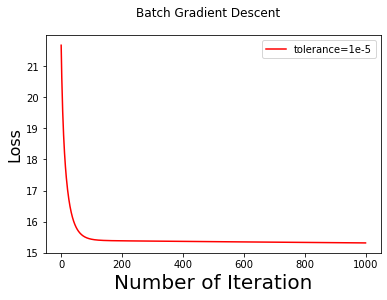

In [10]:
[w,Loss]=BGD(train_x,train_y,lr=0.001,tolerance=1e-5,max_iter=1000)
fig = plt.figure()
fig.suptitle('Batch Gradient Descent')
plt.xlabel('Number of Iteration', fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.plot(Loss, 'r') 
plt.legend(['tolerance=1e-5'])
fig.savefig('BGD.png')